Aplicando modelo Naive Bayes para determinar se um Indivíduo pode ter problemas de diabetes ou não, baseado em variáveis

Dataset obtido no Kaggle ([https://www.kaggle.com/datasets/himanshunakrani/naive-bayes-classification-data](https://www.kaggle.com/datasets/himanshunakrani/naive-bayes-classification-data))

In [9]:
# Conjunto de Importações
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
dados = pd.read_csv('data/d2-diabetes_data.csv')           # lendo o .csv

In [11]:
dados.head()            # vendo o cabeçalho do .csv

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


In [12]:
dados.isna().sum()          # contagem de NaN's no .csv

glucose          0
bloodpressure    0
diabetes         0
dtype: int64

NORMALIZANDO OS DADOS

In [13]:
from sklearn.preprocessing import MinMaxScaler          # importação do sklearn para usar MinMax

In [14]:
normalizador = MinMaxScaler(feature_range=(0,1))            # função MinMax para criação de um normalizador

In [15]:
colunas = dados.columns         # atribuição das colunas a uma variável

colunas_para_normalizar = ['glucose', 'bloodpressure']

# Normalização dos valores para entre -1 e 1
for col in colunas_para_normalizar:
    dados[col] = normalizador.fit_transform(dados[col].values.reshape(-1, 1))

In [16]:
dados.head()            # cabeçalho do .csv (Com dados normalizados entre -1 e 1)

,glucose,bloodpressure,diabetes
0,0.4,0.70,0
1,0.4,0.84,0
2,0.5,0.26,1
3,0.5,0.60,0
4,0.4,0.46,1


Separando em amostra de treino e teste

In [21]:
from sklearn.model_selection import train_test_split            # importação do "train_test_split" do sklearn para realizar o treinamento

In [23]:
X = dados[['glucose', 'bloodpressure']].values  # ('diabetes' é a coluna alvo)
Y = dados['diabetes'].values  # Variável alvo

In [24]:
X_treino,X_teste,Y_treino,Y_teste=train_test_split(X,Y,test_size=0.30,random_state=0)           # separação de 30% para teste e 70% para treino

## MODELO GAUSSIANO

In [25]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB,MultinomialNB           # importação do sklearn para utilização dos modelos

In [26]:
modelo_gaussiano = GaussianNB()          # modelo gaussiano (Naivy Bayes)

In [27]:
modelo_gaussiano.fit(X_treino,Y_treino)          # treinamento do modelo com dados de treino

GaussianNB()

Realizando previsões na amostra de teste

In [28]:
Y_previsto = modelo_gaussiano.predict(X_teste)           # realização de previsões com a amostra de teste

Gerando matriz de confusão

In [29]:
from sklearn.metrics import confusion_matrix            # importação do "confusion_matrix" do Sklearn para gerar a matriz de confusão

In [30]:
confusion_matrix_gaussiano = confusion_matrix(Y_teste,Y_previsto)            # Utilização do método confusion_matrix(), com os dados de teste e dados previstos

<Axes: >

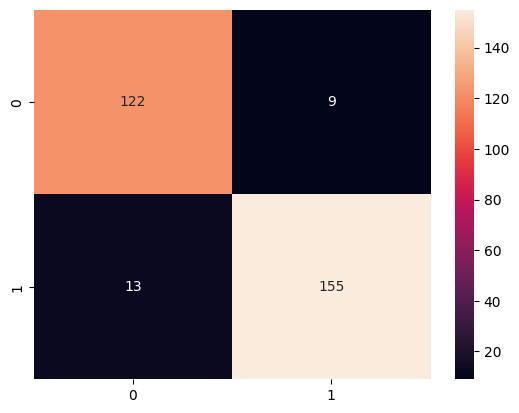

In [31]:
sns.heatmap(confusion_matrix_gaussiano,annot=True, fmt="d")            # criação do heatmap

In [32]:
modelo_gaussiano.score(X_treino,Y_treino)            # Score do modelo no treino -> 93%

0.9367816091954023

In [33]:
modelo_gaussiano.score(X_teste,Y_teste)          # score do modelo no teste -> 92%

0.9264214046822743

## MODELO BERNOULLI

In [34]:
modelo_bernoulli = BernoulliNB()         # modelo Bernoulli (Naive Bayes)

In [35]:
modelo_bernoulli.fit(X_treino,Y_treino)          # treinamento do modelo com dados de treino 

BernoulliNB()

In [36]:
Y_previsto2 = modelo_bernoulli.predict(X_teste)          # realização de previsões com a amostra de teste

In [37]:
confusion_matrix_bernoulli = confusion_matrix(Y_teste,Y_previsto2)           # Utilização do método confusion_matrix(), com os dados de teste e dados previstos

<Axes: >

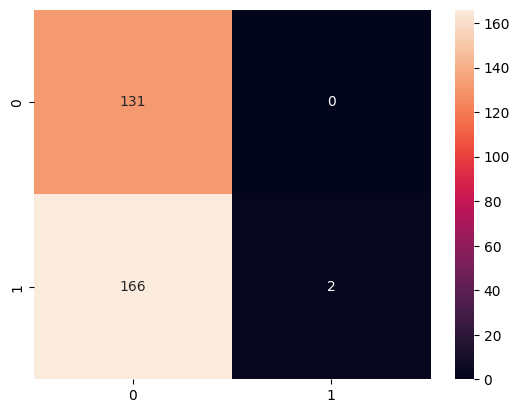

In [38]:
sns.heatmap(confusion_matrix_bernoulli,annot=True, fmt="d")            # criação do heatmap

In [39]:
modelo_bernoulli.score(X_treino,Y_treino)            # Score do modelo no treino -> 52%

0.5272988505747126

In [40]:
modelo_bernoulli.score(X_teste,Y_teste)          # Score do modelo no teste -> 44%

0.44481605351170567

## MODELO MULTINOMIAL

In [41]:
modelo_multinomial = MultinomialNB()            # modelo Multinomial (Naive Bayes)

In [42]:
modelo_multinomial.fit(X_treino,Y_treino)          # treinamento do modelo com dados de treino

MultinomialNB()

In [43]:
Y_previsto2 = modelo_multinomial.predict(X_teste)          # realização de previsões com a amostra de teste

In [44]:
confusion_matrix_multinomial = confusion_matrix(Y_teste,Y_previsto2)           # Utilização do método confusion_matrix(), com os dados de teste e dados previstos

<Axes: >

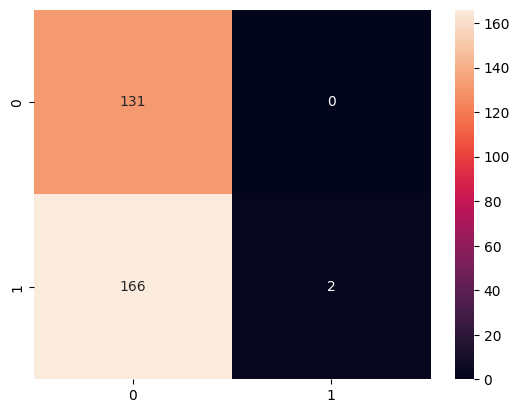

In [45]:
sns.heatmap(confusion_matrix_bernoulli,annot=True, fmt="d")            # criação do heatmap

In [46]:
modelo_multinomial.score(X_treino,Y_treino)            # Score do modelo no treino -> 60%

0.6048850574712644

In [47]:
modelo_multinomial.score(X_teste,Y_teste)          # Score do modelo no teste -> 52%

0.5284280936454849

In [65]:
'''
EX: Fazer uma predição pelo modelo gaussiano:
'''
print(modelo_gaussiano.predict([[0.45, 0.7]]))            # usar numeros entre 0 e 1

[0]


### RESULTADOS:

- Naive Bayes Gaussiano     -> 93%
- Naive Bayes Bernoulli     -> 52%
- Naive Bayes Multinomial   -> 60%